In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
data = datasets.load_wine()

In [6]:
X = data.data
y=data.target


In [7]:
df = pd.DataFrame(X, columns = data.feature_names)
df['wine class'] = y

In [8]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [9]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
wine class                      0
dtype: int64

In [10]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [14]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

X = sc.fit_transform(X)

In [23]:
from sklearn.cluster import KMeans
wss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


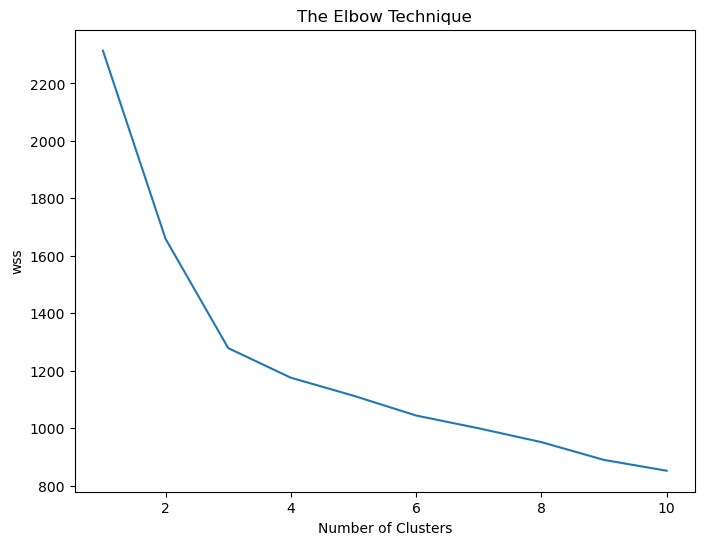

In [27]:
import matplotlib.pyplot as plt
f3, ax = plt.subplots(figsize = (8,6))
plt.plot(range(1,11),wss)
plt.title('The Elbow Technique')
plt.xlabel('Number of Clusters')
plt.ylabel('wss')
plt.show()


In [32]:
N = 3
k_means = KMeans(init = 'k-means++',n_clusters = 10,max_iter = 360)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[9 0 9 9 8 9 0 8 9 9 9 0 0 9 9 8 8 8 9 9 9 2 0 0 0 8 0 0 8 0 8 9 0 8 0 0 8
 0 0 9 9 0 9 2 9 0 9 9 9 9 9 0 9 8 9 9 9 0 9 5 1 1 5 5 4 4 5 5 1 7 1 0 5 8
 5 5 5 1 7 2 5 5 4 1 2 5 4 4 4 4 4 4 4 2 5 7 3 5 5 2 5 5 2 5 5 4 5 4 5 2 2
 5 4 4 4 4 5 5 1 2 2 8 2 2 2 5 2 4 4 2 3 3 3 3 1 1 1 1 1 1 1 1 1 1 3 1 1 6
 6 3 3 3 3 6 6 6 6 6 6 6 6 1 1 1 6 6 6 6 6 3 1 6 6 6 6 6 6 6]


In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(labels, y)

0.14606741573033707